In [2]:
from numpy import *
from matplotlib import *
from pylab import *
import pandas as pd
from matplotlib.colors import ListedColormap

In [3]:
g=5.0
v0=0.1

In [19]:
def jacobian(x,y,b,v0,g,g1,gamma):
    
    J11=2*(gamma-b)-(5*g1*x)/sqrt(2)
    J12=0
    J13=-2*x
    
    J21=g1*y/sqrt(2)
    J22=4*b+g1*x/sqrt(2)
    J23=4*y

    J31=g/(y*2*sqrt(2))
    J32=-1/(y*y*y)-(g*x)/(2*sqrt(2)*y*y)-(45*y*v0*v0)/2.0
    #J32=-1/(y*y*y)-(g*x)/(2*sqrt(2)*y*y)
    J33=-4*b
    
    J = array([
        [J11,J12,J13], 
        [J21,J22,J23],  
        [J31,J32,J33]  
            ])
    return J

In [20]:
 def is_stable(x,y,b,v0,g,g1, gamma):
    J = jacobian(x,y,b,v0,g,g1, gamma)
    eigenvalues = linalg.eigvals(J)
    return all(real(eigenvalues) < 0)

In [28]:
is_stable(1.4142,3.17795,-2.5*(10**(-6)),v0,g,0.00001, 0.00001)

np.True_

array([-1.38491718e-05+0.j        , -5.75222308e-07+2.26186717j,
       -5.75222308e-07-2.26186717j])

In [23]:
df1 = pd.read_csv("fixed_points.txt" , sep='\\s+', header=None)
df1.head()

,0,1,2,3,4
0,0.00001,0.000010,1.414214,3.177950,-0.000003
1,0.00001,0.000011,1.588620,3.272550,-0.000003
2,0.00001,0.000013,1.784535,3.372326,-0.000003
3,0.00001,0.000014,2.004611,3.477423,-0.000004
4,0.00001,0.000016,2.251828,3.587994,-0.000004


In [24]:
g1p=df1[0].to_numpy()
gammap=df1[1].to_numpy()
xp=df1[2].to_numpy()
yp=df1[3].to_numpy()
bp=df1[4].to_numpy()

In [25]:
e=len(g1p)

np.float64(-3.980706983352735e-06)

In [26]:
f2 = open('grid.txt', 'w')
for i in range(0,e):
    s=is_stable(xp[i],yp[i],bp[i],v0,g,g1p[i],gammap[i])
    f2.write(f"{g1p[i]}  {gammap[i]}   {s} \n")
    #f2.write(f"{g[i]}  {g1[i]}   {s} \n")
f2.close() 

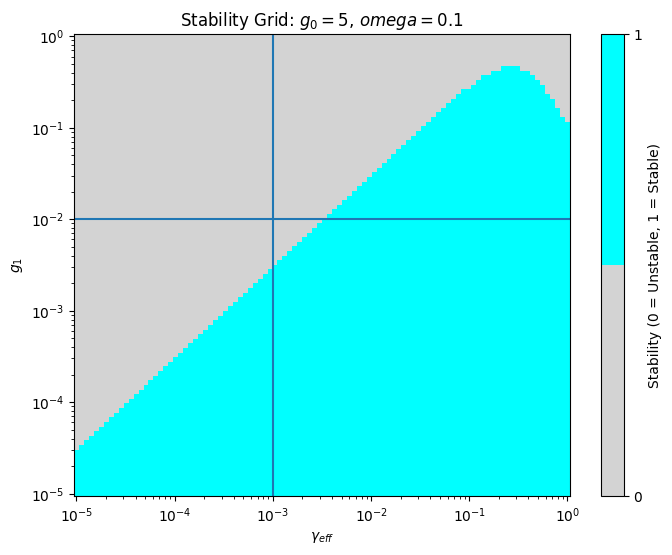

In [27]:
data = pd.read_csv('grid.txt', sep='\\s+', header=None, names=['g1', 'g', 'stable'])
data['stable'] = data['stable'].map({True: 1, False: 0})

# Swap 'g1' and 'g' to have 'gamma' values on the x-axis and 'g1' on the y-axis
grid = data.pivot(index='g1', columns='g', values='stable')
#print(grid.loc[0.01, 0.001])
figure(figsize=(8, 6))
custom_cmap = ListedColormap(['lightgray', (0.0, 1.0, 1.0)])

# Ensure 'grid.columns' (gamma values) are on the x-axis and 'grid.index' (g1 values) are on the y-axis
pcolormesh(grid.columns, grid.index, grid.values, cmap=custom_cmap, shading='auto')
colorbar(ticks=[0, 1], label='Stability (0 = Unstable, 1 = Stable)')

xlabel('$\\gamma_{eff}$')
ylabel('$g_{1}$')
axvline(x=0.001)
axhline(y=0.01)
title('Stability Grid: $g_{0}=5$, $omega=0.1$')
xscale('log')
yscale('log')

savefig("sbra.png", bbox_inches='tight')
show()